In [1]:
#Import libraries
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

In [2]:
#Load the dataset
Training = pd.read_csv('TrainingSet.csv')
Test = pd.read_csv('TestSet.csv')
TrainingSubset = pd.read_csv('TrainingSubset.csv')
TestSubset = pd.read_csv('TestSubset.csv')

In [6]:
Training.head()
Training.columns

Index(['EbayID', 'QuantitySold', 'Price', 'PricePercent', 'StartingBidPercent',
       'SellerName', 'SellerClosePercent', 'Category', 'PersonID',
       'StartingBid', 'AvgPrice', 'EndDay', 'HitCount', 'AuctionAvgHitCount',
       'ItemAuctionSellPercent', 'SellerSaleAvgPriceRatio', 'SellerAvg',
       'SellerItemAvg', 'AuctionHitCountAvgRatio', 'BestOffer',
       'ReturnsAccepted', 'IsHOF', 'ItemListedCount', 'AuctionCount',
       'AuctionSaleCount', 'SellerAuctionCount', 'SellerAuctionSaleCount',
       'AuctionMedianPrice'],
      dtype='object')

In [7]:
all_cols = ['Price', 'StartingBidPercent','SellerClosePercent', 'Category','StartingBid', 'EndDay', 'HitCount', 'AuctionAvgHitCount',
       'SellerSaleAvgPriceRatio', 'SellerAvg','SellerItemAvg', 'BestOffer',
       'AuctionCount','AuctionSaleCount', 'SellerAuctionCount', 'SellerAuctionSaleCount']
selec =  ['Price', 'StartingBidPercent', 'StartingBid', 'HitCount', 'BestOffer','AuctionCount']
Training[selec].describe()

,Price,StartingBidPercent,StartingBid,HitCount,BestOffer,AuctionCount
count,258588.000000,258588.000000,258588.000000,258588.000000,258588.000000,258588.000000
mean,28.961397,1.350498,22.554573,13.124476,0.268529,251.026823
std,44.557177,12.022299,39.921438,24.894116,0.427103,342.166491
min,0.010000,0.000000,0.010000,-1.000000,-0.333333,1.000000
25%,3.290000,0.344500,1.990000,2.000000,0.047619,41.000000
50%,9.990000,0.785200,9.950000,5.000000,0.111111,114.000000
75%,34.010000,1.376900,24.950000,11.000000,0.291667,307.000000
max,299.990000,1799.000000,299.990000,1161.000000,18.750000,2213.000000


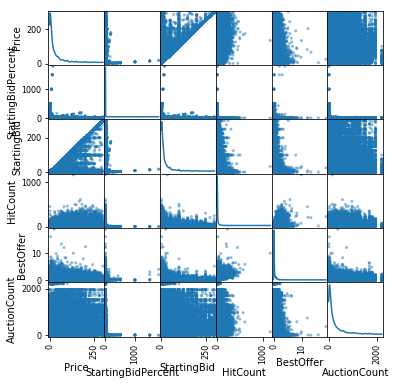

In [8]:
all_scatter = pd.plotting.scatter_matrix(Training[selec], diagonal="kde", figsize=(6, 6))

In [3]:
#Prints the name of features in the dataset
Training.keys()

Index(['EbayID', 'QuantitySold', 'Price', 'PricePercent', 'StartingBidPercent',
       'SellerName', 'SellerClosePercent', 'Category', 'PersonID',
       'StartingBid', 'AvgPrice', 'EndDay', 'HitCount', 'AuctionAvgHitCount',
       'ItemAuctionSellPercent', 'SellerSaleAvgPriceRatio', 'SellerAvg',
       'SellerItemAvg', 'AuctionHitCountAvgRatio', 'BestOffer',
       'ReturnsAccepted', 'IsHOF', 'ItemListedCount', 'AuctionCount',
       'AuctionSaleCount', 'SellerAuctionCount', 'SellerAuctionSaleCount',
       'AuctionMedianPrice'],
      dtype='object')

In [4]:
#Preprocessing Step 1:
#Check if Training and test set has any null values or not
print(Training.isnull().values.any())
print(Test.isnull().values.any())

False
False


In [5]:
#Apply correlation to data to check relation between different columns
correlation = Training.corr()
correlation

,EbayID,QuantitySold,Price,PricePercent,StartingBidPercent,SellerClosePercent,Category,PersonID,StartingBid,AvgPrice,...,AuctionHitCountAvgRatio,BestOffer,ReturnsAccepted,IsHOF,ItemListedCount,AuctionCount,AuctionSaleCount,SellerAuctionCount,SellerAuctionSaleCount,AuctionMedianPrice
EbayID,1.000000,0.051621,-0.053406,0.000145,-0.001235,0.082350,0.070322,-0.015432,-0.078355,-0.031546,...,-0.080177,-0.015042,NaN,0.111208,-0.042256,-0.034686,-0.041640,0.173196,0.236649,-0.042258
QuantitySold,0.051621,1.000000,0.061080,-0.034879,-0.050568,0.626917,-0.057478,0.010823,-0.172144,0.108310,...,0.143061,0.439053,NaN,0.014467,0.096494,0.106792,0.160403,-0.078832,0.236291,0.179222
Price,-0.053406,0.061080,1.000000,0.024128,0.016414,0.088385,-0.305892,0.011476,0.844167,0.397352,...,0.539702,0.146629,NaN,-0.066227,0.276417,0.317842,0.380123,-0.174107,-0.059713,0.677254
PricePercent,0.000145,-0.034879,0.024128,1.000000,0.999446,-0.036416,0.005503,0.001540,0.030438,-0.015804,...,-0.007183,0.011242,NaN,0.004255,-0.012742,-0.019745,-0.018190,0.007062,-0.015258,-0.021811
StartingBidPercent,-0.001235,-0.050568,0.016414,0.999446,1.000000,-0.052484,0.007185,0.001592,0.034863,-0.018725,...,-0.012384,-0.004336,NaN,0.003355,-0.016108,-0.023633,-0.023521,0.008918,-0.020860,-0.027164
SellerClosePercent,0.082350,0.626917,0.088385,-0.036416,-0.052484,1.000000,-0.086185,0.012070,-0.163144,0.120629,...,0.205835,0.384663,NaN,0.014416,0.109219,0.123390,0.170401,-0.150081,0.360049,0.200841
Category,0.070322,-0.057478,-0.305892,0.005503,0.007185,-0.086185,1.000000,-0.001267,-0.258967,-0.191164,...,-0.345987,-0.050477,NaN,-0.020137,-0.166870,-0.232057,-0.187439,0.100096,0.028717,-0.311149
PersonID,-0.015432,0.010823,0.011476,0.001540,0.001592,0.012070,-0.001267,1.000000,0.013099,0.012036,...,0.010731,0.040926,NaN,-0.023821,-0.122562,-0.079213,-0.061620,-0.035264,-0.015783,0.020187
StartingBid,-0.078355,-0.172144,0.844167,0.030438,0.034863,-0.163144,-0.258967,0.013099,1.000000,0.288179,...,0.408400,-0.093911,NaN,-0.076905,0.223201,0.233173,0.262384,-0.157329,-0.139745,0.486580
AvgPrice,-0.031546,0.108310,0.397352,-0.015804,-0.018725,0.120629,-0.191164,0.012036,0.288179,1.000000,...,0.364373,0.093788,NaN,-0.041922,0.175701,0.188671,0.230760,-0.100043,-0.020879,0.545672


In [6]:
#Training data drop QuantitySold, SellerName,EndDay  column
trainData = Training.drop(['QuantitySold','SellerName','EndDay'],axis=1)
testData = Test.drop(['QuantitySold','SellerName','EndDay'],axis=1)
#Target Data has QuantitySold column
targetTrainData = Training['QuantitySold'] 
targetTestData = Test['QuantitySold'] 

In [7]:
#Preprocessing Step 2
#Standardize and scale the data
from sklearn import preprocessing
trainDataScale = preprocessing.scale(trainData)
testDataScale = preprocessing.scale(testData)

c:\users\kashika\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  after removing the cwd from sys.path.
c:\users\kashika\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
c:\users\kashika\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """
c:\users\kashika\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not 

In [8]:
#Preprocessing Step 3
#Apply lasso to see the important features
from sklearn import linear_model
lasso = linear_model.Lasso(alpha=0.1)
lasso.fit(trainDataScale,targetTrainData)
print(lasso.coef_)
print(trainData.keys())

[ 0.         -0.         -0.         -0.          0.16380209 -0.
  0.         -0.          0.          0.04019345  0.          0.
  0.         -0.          0.          0.          0.01505072  0.
  0.          0.          0.          0.         -0.          0.
  0.        ]
Index(['EbayID', 'Price', 'PricePercent', 'StartingBidPercent',
       'SellerClosePercent', 'Category', 'PersonID', 'StartingBid', 'AvgPrice',
       'HitCount', 'AuctionAvgHitCount', 'ItemAuctionSellPercent',
       'SellerSaleAvgPriceRatio', 'SellerAvg', 'SellerItemAvg',
       'AuctionHitCountAvgRatio', 'BestOffer', 'ReturnsAccepted', 'IsHOF',
       'ItemListedCount', 'AuctionCount', 'AuctionSaleCount',
       'SellerAuctionCount', 'SellerAuctionSaleCount', 'AuctionMedianPrice'],
      dtype='object')


In [9]:
#Choose the important features only i.e. 'SellerClosePercent','HitCount', 'BestOffer' and again standardize
trainData=Training[['SellerClosePercent','HitCount', 'BestOffer']]
testData=Test[['SellerClosePercent','HitCount', 'BestOffer']]
trainDataScale = preprocessing.scale(trainData)
testDataScale = preprocessing.scale(testData)

c:\users\kashika\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  after removing the cwd from sys.path.
c:\users\kashika\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """


In [10]:
#Preprocessing Step 4
#Perform Principal Component Analysis
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents0 = pca.fit_transform(trainDataScale)
trainDataScaled = pd.DataFrame(data = principalComponents0)
principalComponents1 = pca.fit_transform(testDataScale)
testDataScaled = pd.DataFrame(data = principalComponents1)

In [11]:
#Do Classification using various models
print('Classification Techniques :')
#Classification Technique 1
print('Classification Technique 1 : ')
#Create the classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
ClassifierKNN = KNeighborsClassifier()
#Train the classifier 
ClassifierKNN.fit(trainDataScaled,targetTrainData)
print('K Nearest Neighbor')
#Predict on test data
PredictKNN = ClassifierKNN.predict(testDataScaled)
#Confusion Matrix
confusionMatrixKNN = pd.crosstab(targetTestData,PredictKNN, rownames=['Actual'], colnames=['Predicted'], margins=True)
print('Confusion Matrix:\n',confusionMatrixKNN)
#Checking the accuracy if prediction of test data is correct
AccuracyKNN = metrics.accuracy_score(targetTestData, PredictKNN)
print ('Accuracy',AccuracyKNN)
#Recall
RecallKNN = metrics.recall_score(targetTestData, PredictKNN)
print ('Recall',RecallKNN)
#Precision
PrecisionKNN = metrics.precision_score(targetTestData, PredictKNN)
print ('Precision',PrecisionKNN)
#F-score
FscoreKNN = metrics.f1_score(targetTestData, PredictKNN)
print ('F-score',FscoreKNN)

Classification Techniques :
Classification Technique 1 : 
K Nearest Neighbor
Confusion Matrix:
 Predicted      0     1    All
Actual                       
0          25233  2828  28061
1           2520  6879   9399
All        27753  9707  37460
Accuracy 0.8572343833422317
Recall 0.7318863708905202
Precision 0.7086638508292984
F-score 0.7200879304930389


In [12]:
#Classification Technique 2
print('Classification Technique 2 :')
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
#Create the classifier
ClassifierDecisionTree = DecisionTreeClassifier()
#Train the classifier 
ClassifierDecisionTree.fit(trainDataScaled,targetTrainData)
print('Decision Tree')
#Predict on test data
PredictDecisionTree = ClassifierDecisionTree.predict(testDataScaled)
#Confusion Matrix
confusionMatrixDecisionTree = pd.crosstab(targetTestData,PredictDecisionTree, rownames=['Actual'], colnames=['Predicted'], margins=True)
print('Confusion Matrix:\n',confusionMatrixDecisionTree)
#Checking the accuracy if prediction of test data is correct
from sklearn.metrics import accuracy_score
AccuracyDecisionTree=metrics.accuracy_score(targetTestData, PredictDecisionTree)
print('Accuracy',AccuracyDecisionTree)
#Recall
from sklearn.metrics import recall_score
RecallDecisionTree=metrics.recall_score(targetTestData, PredictDecisionTree)
print('Recall',RecallDecisionTree)
#Precision
from sklearn.metrics import precision_score
PrecisionDecisionTree=metrics.precision_score(targetTestData, PredictDecisionTree)
print('Precision',PrecisionDecisionTree)
#F-score
from sklearn.metrics import f1_score
FscoreDecisionTree=metrics.f1_score(targetTestData, PredictDecisionTree)
print('F-score',FscoreDecisionTree)

Classification Technique 2 :
Decision Tree
Confusion Matrix:
 Predicted      0      1    All
Actual                        
0          23664   4397  28061
1           2636   6763   9399
All        26300  11160  37460
Accuracy 0.8122530699412707
Recall 0.7195446324077029
Precision 0.6060035842293907
F-score 0.6579113770125007


In [13]:
print('Classification Technique 3 :')
#Logistic Regression
from sklearn.linear_model import LogisticRegression
#Create the classifier
ClassifierLogisticRegression = LogisticRegression()
#Train the classifier 
ClassifierLogisticRegression.fit(trainDataScaled,targetTrainData)
print('Logistic Regression')
#Predict on test data
PredictLogisticRegression = ClassifierLogisticRegression.predict(testDataScaled)
#Confusion Matrix
confusionMatrixLogisticRegression = pd.crosstab(targetTestData,PredictLogisticRegression, rownames=['Actual'], colnames=['Predicted'], margins=True)
print('Confusion Matrix:\n',confusionMatrixLogisticRegression)
#Checking the accuracy if prediction of test data is correct
from sklearn.metrics import accuracy_score
AccuracyLogisticRegression=metrics.accuracy_score(targetTestData, PredictLogisticRegression)
print('Accuracy',AccuracyLogisticRegression)
#Recall
RecallLogisticRegression = recall_score(PredictLogisticRegression,targetTestData)
print('Recall',RecallLogisticRegression)
#Precision
PrecisionLogisticRegression = precision_score(PredictLogisticRegression,targetTestData)
print('Precision',PrecisionLogisticRegression)
#F-score
FscoreLogisticRegression = f1_score(PredictLogisticRegression,targetTestData)
print('F-score',FscoreLogisticRegression)

Classification Technique 3 :


c:\users\kashika\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression
Confusion Matrix:
 Predicted      0     1    All
Actual                       
0          26433  1628  28061
1           2804  6595   9399
All        29237  8223  37460
Accuracy 0.8816871329418046
Recall 0.8020187279581661
Precision 0.7016703904670709
F-score 0.7484961979344001


In [ ]:
#Classification Technique 4
print('Classification Technique 4 : ')
#Support Vector Machine
from sklearn import svm
#Create the Classifier
ClassifierSVM = svm.SVC(C = 10, gamma = 0.1)
#Train the Classifier 
ClassifierSVM.fit(trainDataScaled,targetTrainData)
print('Support Vector Machine')
#Predict on test data
PredictSVM = ClassifierSVM.predict(testDataScaled)
#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusionMatrixSVM = pd.crosstab(targetTestData,PredictSVM, rownames=['Actual'], colnames=['Predicted'], margins=True)
print('Confusion Matrix:\n',confusionMatrixSVM)
#Checking the accuracy if prediction of test data is correct
AccuracySVM = accuracy_score(PredictSVM,targetTestData)
print('Accuracy',AccuracySVM)
#Recall
RecallSVM = recall_score(PredictSVM,targetTestData)
print('Recall',RecallSVM)
#Precision
PrecisionSVM = precision_score(PredictSVM,targetTestData)
print('Precision',PrecisionSVM)
#F-score
FscoreSVM = f1_score(PredictSVM,targetTestData)
print('F-score',FscoreSVM)

Classification Technique 4 : 


In [14]:
#Classification Technique 5
print('Classification Technique 5 : ')
#Random Forest
from sklearn.ensemble import RandomForestClassifier
#Create the classifier
ClassifierRandomForest = RandomForestClassifier()
#Train the classifier 
ClassifierRandomForest.fit(trainDataScaled,targetTrainData)
print('Random Forest')
#Predict on test data
PredictRandomForest = ClassifierRandomForest.predict(trainDataScaled)
#Confusion Matrix
confusionMatrixRandomForest = pd.crosstab(targetTrainData,PredictRandomForest, rownames=['Actual'], colnames=['Predicted'], margins=True)
print('Confusion Matrix',confusionMatrixRandomForest)
#Checking the accuracy if prediction of test data is correct
AccuracyRandomForest = metrics.accuracy_score(targetTrainData,PredictRandomForest)
print('Accuracy',AccuracyRandomForest)
#Recall
RecallRandomForest = metrics.recall_score(targetTrainData,PredictRandomForest)
print('Recall',RecallRandomForest)
#Precision
PrecisionRandomForest = metrics.precision_score(targetTrainData,PredictRandomForest)
print('Precision',PrecisionRandomForest)
#F-score
FscoreRandomForest = metrics.f1_score(targetTrainData,PredictRandomForest)
print('F-score',FscoreRandomForest)

Classification Technique 5 : 


c:\users\kashika\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest
Confusion Matrix Predicted       0      1     All
Actual                          
0          175872   2961  178833
1            6898  72857   79755
All        182770  75818  258588
Accuracy 0.9618737141708045
Recall 0.9135101247570685
Precision 0.9609459495106702
F-score 0.9366278210229281


In [15]:
#Plot the features
def plot_feature_importances_mydata(model):
    n_features = trainDataScaled.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), list(trainDataScaled))
    plt.xlabel("Variable importance")
    plt.ylabel("Independent Variable")
    

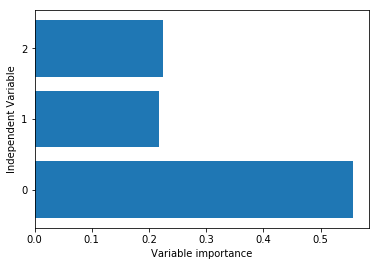

In [16]:
#Random Forest Classifier
plot_feature_importances_mydata(ClassifierRandomForest)

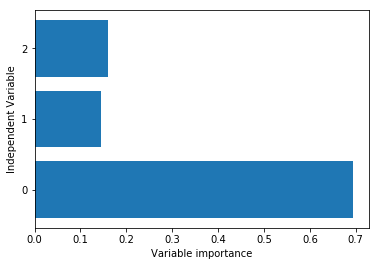

In [17]:
#Decision Tree Classifier
plot_feature_importances_mydata(ClassifierDecisionTree)